<a href="https://colab.research.google.com/github/pingkivila/DigitalSkola_DataScience11/blob/main/Intermediate_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Intermediate Statistic**

created by Pingki Vila Tri Wahyuni
This notebook is created to teach student about intermediate statistic. All the code is free to reuse by everyone


---



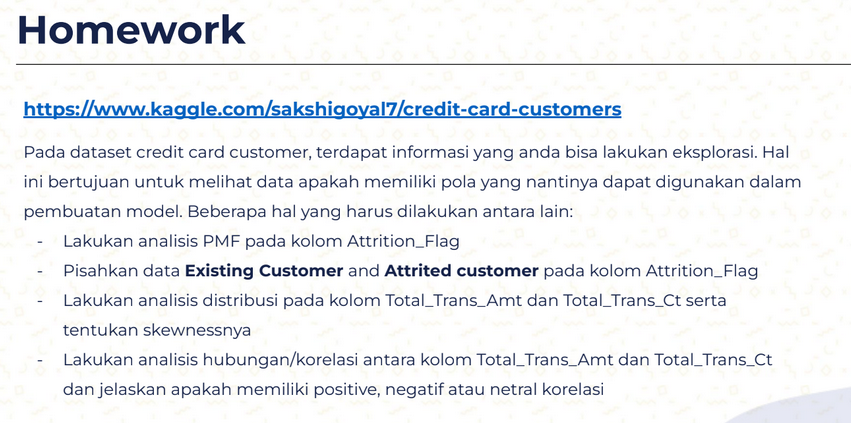

In [ ]:
!pip install empiricaldist

In [ ]:
import pandas as pd
import numpy as np
from empiricaldist import Pmf, Cdf

import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
data = pd.read_csv("BankChurners.csv.zip")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
data.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

**Analisa PMF pada kolom Attrition_flag**

In [ ]:
data['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [ ]:
data_pmf = Pmf.from_seq(data['Attrition_Flag'], normalize=True)
data_pmf.head()

,probs
Attrited Customer,0.16066
Existing Customer,0.83934


Dengan menggunakan pmf dapat kita lihat bahwa Existing Customer memiliki nilai lebih tinggi dari pada Attrited Customer

**Pisahkan data Existing Customer and Atrrited customer pada kolom Attrition_Flag**

In [ ]:
#difilter dengan hanya menampilkan Existing Customer

exist_customer = data[data['Attrition_Flag'] == 'Existing Customer']
exist_customer.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
#difilter dengan hanya menampilkan Attrited Customer

Attrited_Customer = data[data['Attrition_Flag'] == 'Attrited Customer']
Attrited_Customer.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.99780,0.002197
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,2,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,1,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771


In [ ]:
#Difilter dengan menambahkan/ membuat variabel baru di kolom paling belakang

data["Existing_Customer"] = data['Attrition_Flag'].apply(lambda x: "Existing Customer" if x == "Existing Customer" else "NaN")
data.head()
data["Attrited_Customer"] = data['Attrition_Flag'].apply(lambda x: "Attrited Customer" if x == "Attrited Customer" else "NaN")
data.head(25)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Existing_Customer,Attrited_Customer
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,Existing Customer,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,Existing Customer,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,Existing Customer,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,Existing Customer,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,Existing Customer,NaN
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.999940,Existing Customer,NaN
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.999880,Existing Customer,NaN
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.999910,Existing Customer,NaN
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.999960,Existing Customer,NaN
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.999700,Existing Customer,NaN


**Lakukan analisis distribusi pada kolom Total_Trans_Amt dan Total_Trans_Ct serta
tentukan skewnessnya**

Skewness:  2.0410034025756936


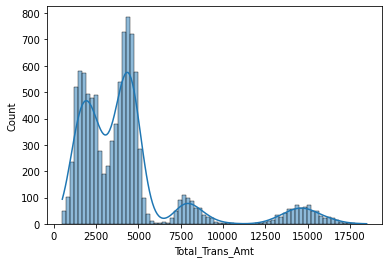

In [ ]:
sns.histplot(data=data, x='Total_Trans_Amt', kde=True)
print("Skewness: ", data['Total_Trans_Amt'].skew())
plt.show()

Skewness:  0.15367306849872275


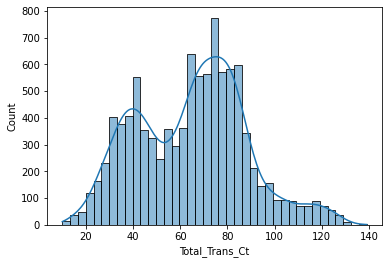

In [ ]:
sns.histplot(data=data, x='Total_Trans_Ct', kde=True)
print("Skewness: ", data['Total_Trans_Ct'].skew())
plt.show()

In [ ]:
skew = data[['Total_Trans_Amt', 'Total_Trans_Ct']].skew()
skew = pd.DataFrame(overall_skew).T.rename({0:'all data skewness'})
skew.head()

,all data skewness
Total_Trans_Amt,2.041003
Total_Trans_Ct,0.153673


Dapat dilihat bahwa nilai Total_Trans_Amt sebesar 2.041 dan pada diagram menunjukkan bahwa atribut Total_Trans_Amt condong miring kekanan yang berarti termasuk right skeweness. Sedangkan pada Total_Trans_Ct menunjukkan hasil bahwa diagram tidak terlalau condong hanya saja sedikit condong kekiri hal ini dikarenakan nilai Total_Trans_Amt sebesar 0.15 dan nilainya hampir mendekati nol.

**Lakukan analisis hubungan/korelasi antara kolom Total_Trans_Amt dan Total_Trans_Ct
dan jelaskan apakah memiliki positive, negatif atau netral korelasi**

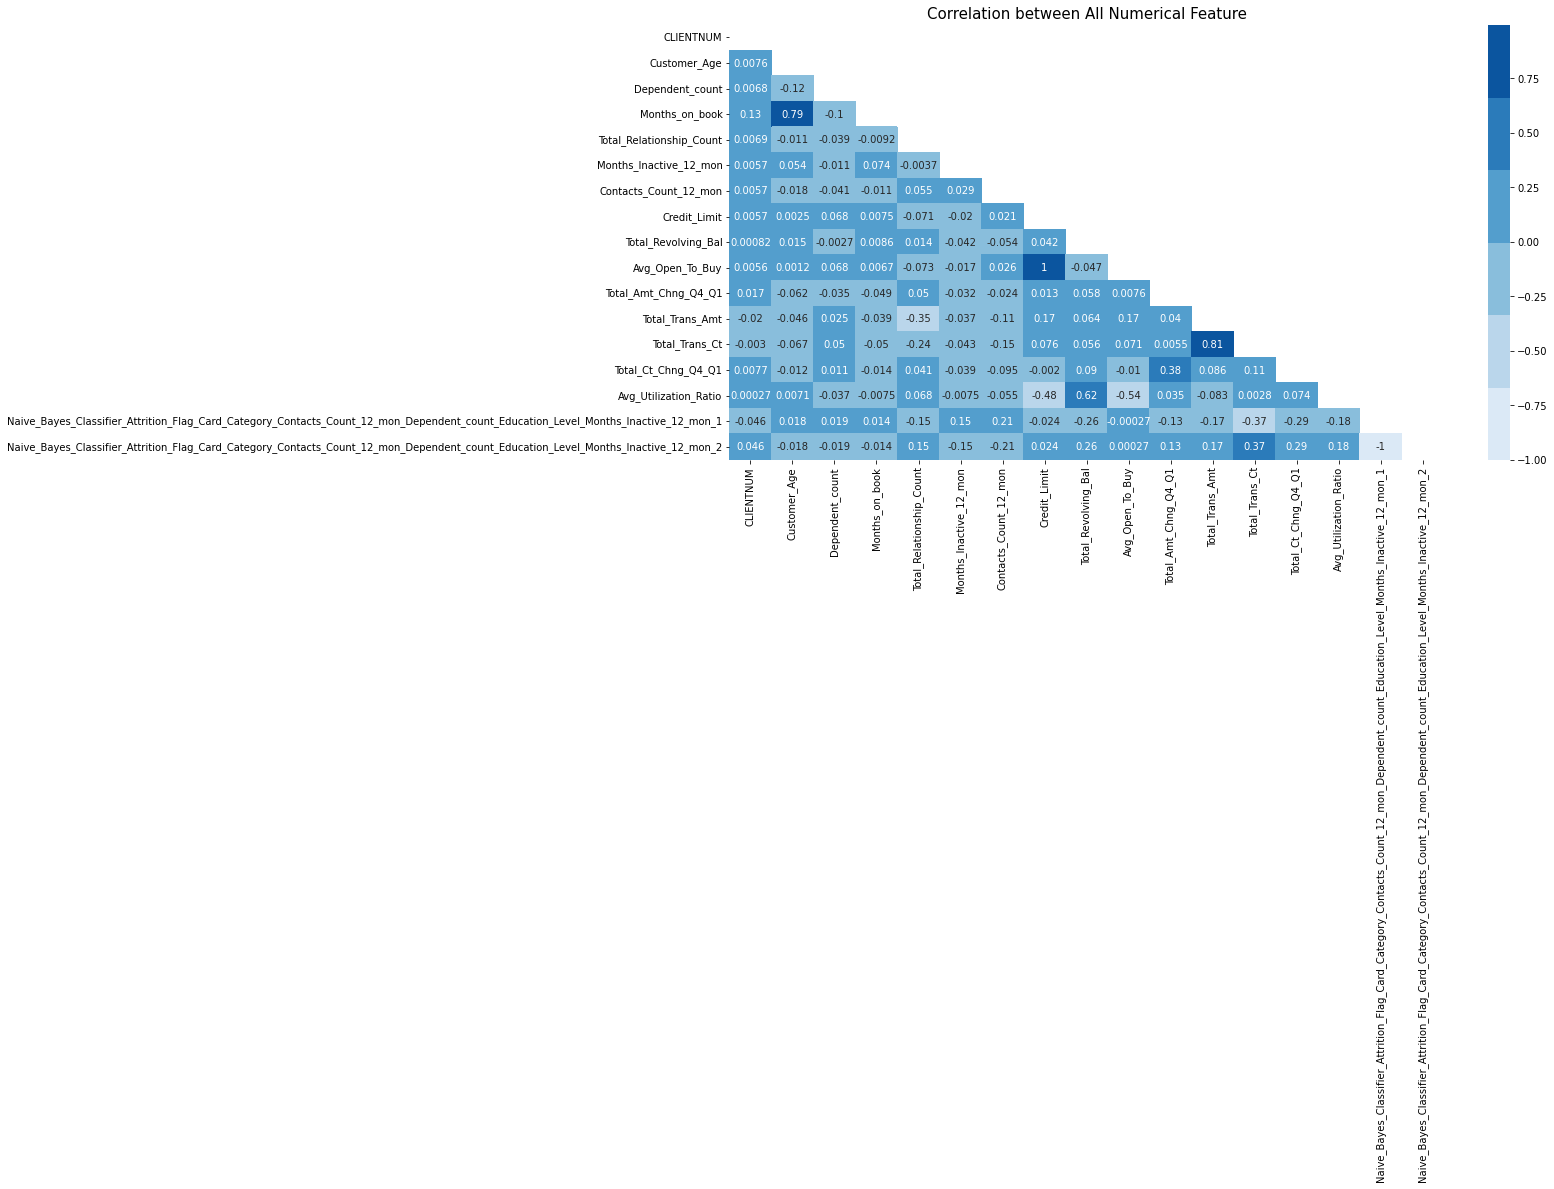

In [ ]:
# prepare figure
plt.figure(figsize=(16,8))
plt.title('Correlation between All Numerical Feature', size=15)


mask = np.triu(np.ones_like(data.corr()))
colormap = sns.color_palette("Blues")
sns.heatmap(data.corr(), annot=True, cmap=colormap, mask=mask)


plt.show()

berdasarkan plot diatas menunjukkan bahwa hubungan/korelasi antara kolom Total_Trans_Amt dan Total_Trans_Ct sebesar 0.81 yang berarti bahwa bernilai positif dan berkorelasi tinggi